### Python Project based on Data Driven Crime Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("CrimeDs.csv")
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,03-01-2020 00:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,02-08-2020 00:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,11-04-2020 00:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,03-10-2020 00:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09-09-2020 00:00,09-09-2020 00:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
5,200209713,05-03-2020 00:00,05-02-2020 00:00,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771
6,200200759,07-07-2020 00:00,07-07-2020 00:00,1340,2,Rampart,265,1,648,ARSON,...,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
7,201308739,03/27/2020 12:00:00 AM,03/27/2020 12:00:00 AM,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643
8,201112065,07/31/2020 12:00:00 AM,07/30/2020 12:00:00 AM,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,KENMORE ST,FOUNTAIN,34.0953,-118.2974
9,200121929,12-04-2020 00:00,12-03-2020 00:00,2300,1,Central,105,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,400 SOLANO AV,NaN,34.0710,-118.2302


In [27]:
print(df.isnull().sum())

# Calculate the percentage of missing data
print((df.isnull().sum() / len(df)) * 100)

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151760
Vict Age                0
Vict Sex           144782
Vict Descent       144794
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677918
Weapon Desc        677918
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           936039
Crm Cd 3          1002884
Crm Cd 4          1005134
LOCATION                0
Cross Street       850955
LAT                     0
LON                     0
dtype: int64
DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd 

In [28]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['DATE OCC'])
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09-09-2020 00:00,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005177,252104112,02-02-2025 00:00,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1005183,250304148,02-08-2025 00:00,2025-02-06,2215,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 S CATALINA ST,NaN,34.0328,-118.2942
1005185,250304031,01-07-2025 00:00,2025-01-02,1832,3,Southwest,312,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,5100 W JEFFERSON BL,NaN,34.0255,-118.3549
1005186,250504138,02-10-2025 00:00,2025-02-06,30,5,Harbor,523,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,2000 JOHN S GIBSON BL,NaN,33.7566,-118.2896


In [29]:
# Example for Crime Type column
df['Crm Cd Desc'] = df['Crm Cd Desc'].str.strip().str.upper()
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09-09-2020 00:00,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005177,252104112,02-02-2025 00:00,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1005183,250304148,02-08-2025 00:00,2025-02-06,2215,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 S CATALINA ST,NaN,34.0328,-118.2942
1005185,250304031,01-07-2025 00:00,2025-01-02,1832,3,Southwest,312,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,5100 W JEFFERSON BL,NaN,34.0255,-118.3549
1005186,250504138,02-10-2025 00:00,2025-02-06,30,5,Harbor,523,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,2000 JOHN S GIBSON BL,NaN,33.7566,-118.2896


In [30]:
# Remove duplicate rows
df = df.drop_duplicates()
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09-09-2020 00:00,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005177,252104112,02-02-2025 00:00,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1005183,250304148,02-08-2025 00:00,2025-02-06,2215,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 S CATALINA ST,NaN,34.0328,-118.2942
1005185,250304031,01-07-2025 00:00,2025-01-02,1832,3,Southwest,312,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,5100 W JEFFERSON BL,NaN,34.0255,-118.3549
1005186,250504138,02-10-2025 00:00,2025-02-06,30,5,Harbor,523,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,2000 JOHN S GIBSON BL,NaN,33.7566,-118.2896


In [31]:
# Drop rows with invalid coordinates (0,0 or NaN)
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]
df = df.dropna(subset=['LAT', 'LON'])
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09-09-2020 00:00,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005177,252104112,02-02-2025 00:00,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1005183,250304148,02-08-2025 00:00,2025-02-06,2215,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 S CATALINA ST,NaN,34.0328,-118.2942
1005185,250304031,01-07-2025 00:00,2025-01-02,1832,3,Southwest,312,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,5100 W JEFFERSON BL,NaN,34.0255,-118.3549
1005186,250504138,02-10-2025 00:00,2025-02-06,30,5,Harbor,523,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,2000 JOHN S GIBSON BL,NaN,33.7566,-118.2896


In [32]:
# Option 1: Fill missing with a placeholder
df['AREA NAME'] = df['AREA NAME'].fillna('UNKNOWN')

# Option 2: Drop rows if important
df = df.dropna(subset=['Vict Descent', 'Vict Sex'])  # Example columns
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
6,200200759,07-07-2020 00:00,2020-07-07,1340,2,Rampart,265,1,648,ARSON,...,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005170,251904122,02/13/2025 12:00:00 AM,2025-02-12,1430,19,Mission,1902,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,NaN,NaN,NaN,14500 BLEDSOE ST,NaN,34.3199,-118.4490
1005175,251804136,02-11-2025 00:00,2025-02-11,730,18,Southeast,1842,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,200 E 112TH ST,NaN,33.9330,-118.2716
1005177,252104112,02-02-2025 00:00,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1005185,250304031,01-07-2025 00:00,2025-01-02,1832,3,Southwest,312,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,5100 W JEFFERSON BL,NaN,34.0255,-118.3549


In [33]:
# Save to a new file
df.to_csv("Cleaned_Crime_Data.csv", index=False)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
6,200200759,07-07-2020 00:00,2020-07-07,1340,2,Rampart,265,1,648,ARSON,...,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005170,251904122,02/13/2025 12:00:00 AM,2025-02-12,1430,19,Mission,1902,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,NaN,NaN,NaN,14500 BLEDSOE ST,NaN,34.3199,-118.4490
1005175,251804136,02-11-2025 00:00,2025-02-11,730,18,Southeast,1842,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,200 E 112TH ST,NaN,33.9330,-118.2716
1005177,252104112,02-02-2025 00:00,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1005185,250304031,01-07-2025 00:00,2025-01-02,1832,3,Southwest,312,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,5100 W JEFFERSON BL,NaN,34.0255,-118.3549


### Visualisation....

#### Time Series Plot

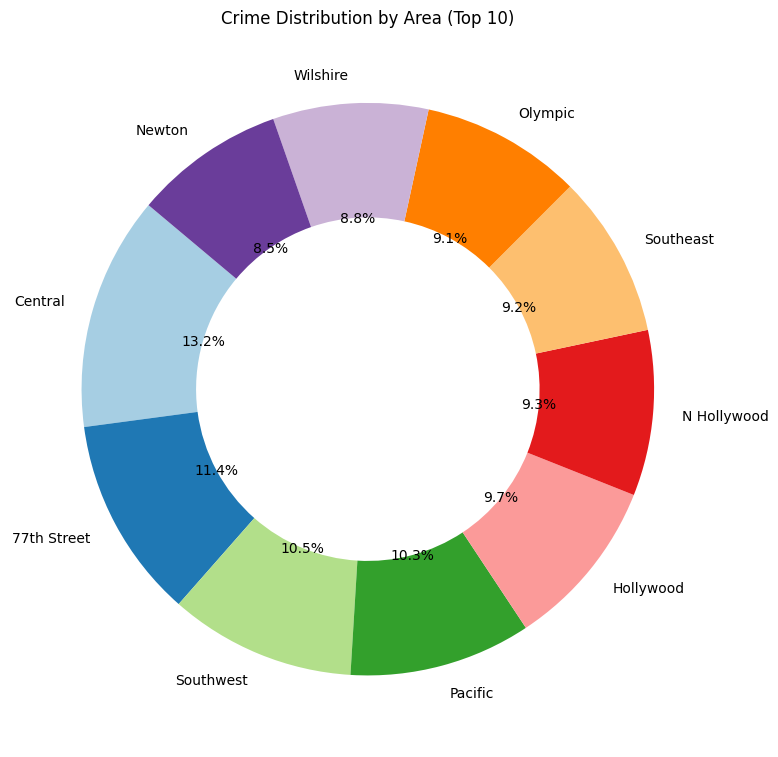

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Count crimes by area name
area_crime_counts = df['AREA NAME'].value_counts().nlargest(10)  # Top 10 areas

# Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors
plt.pie(area_crime_counts, labels=area_crime_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})

plt.title('Crime Distribution by Area (Top 10)')
plt.tight_layout()
plt.show()


#### Bar PLot

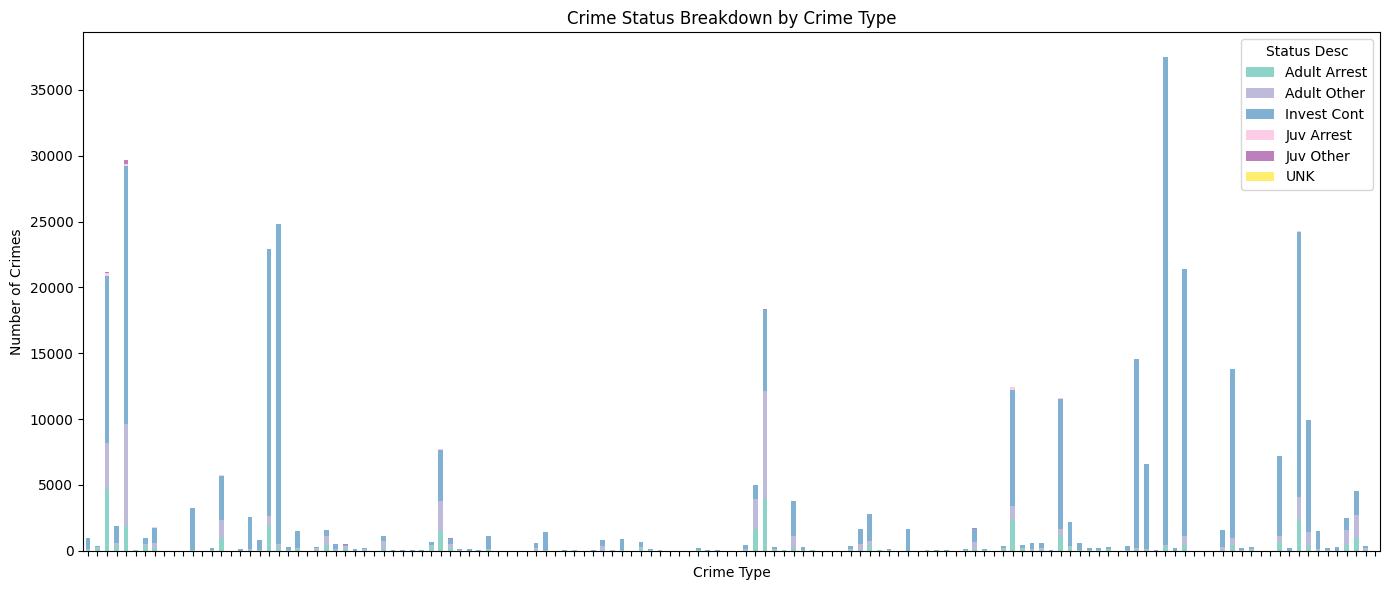

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Count crime statuses by crime type
crime_status_breakdown = pd.crosstab(df['Crm Cd Desc'], df['Status Desc'])

# Plot stacked bar chart
ax = crime_status_breakdown.plot(kind='bar', stacked=True, figsize=(14, 6), cmap='Set3')
plt.title('Crime Status Breakdown by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')

# Remove x-axis labels (names)
ax.set_xticklabels([])

plt.tight_layout()
plt.show()


#### Bar Plot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\1105274759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='Blues_d')


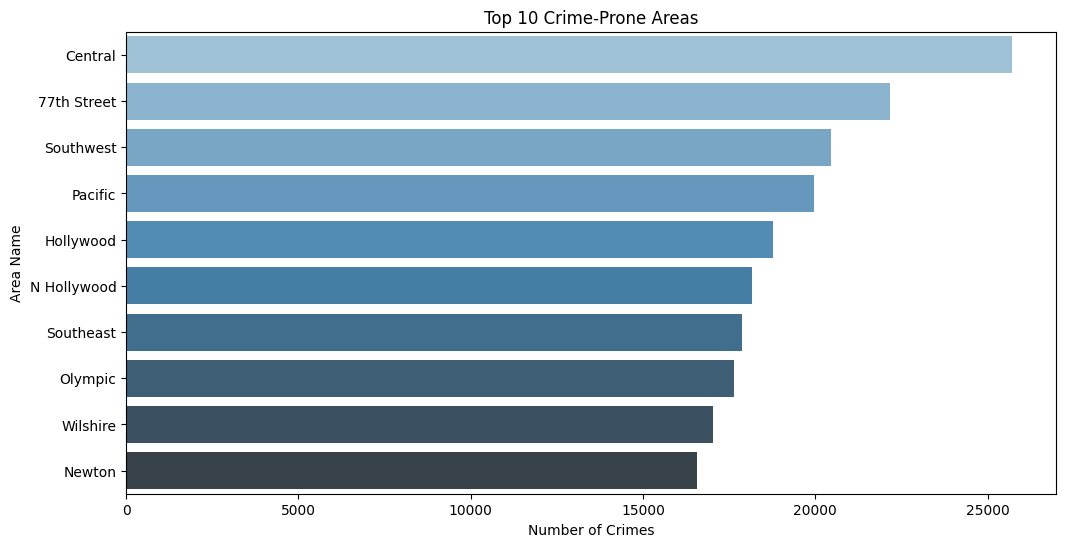

In [42]:
plt.figure(figsize=(12,6))
top_areas = df['AREA NAME'].value_counts().head(10)

sns.barplot(x=top_areas.values, y=top_areas.index, palette='Blues_d')
plt.title('Top 10 Crime-Prone Areas')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.show()

#### CountPlot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\3554634806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\3554634806.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = df.resample('M', on='Date Rptd').size()


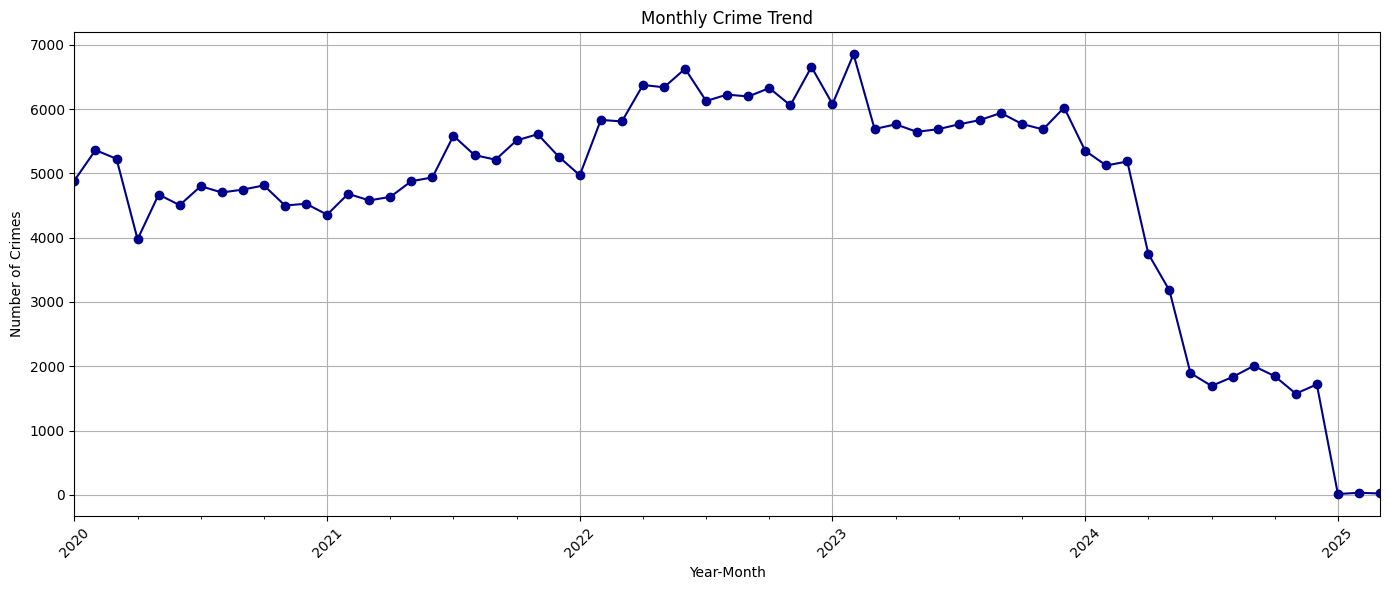

In [48]:
# Convert 'Date Rptd' to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

# Resample by month and count the number of crimes
monthly_crimes = df.resample('M', on='Date Rptd').size()

# Plot the trend
plt.figure(figsize=(14,6))
monthly_crimes.plot(marker='o', color='darkblue')
plt.title('Monthly Crime Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Countplot

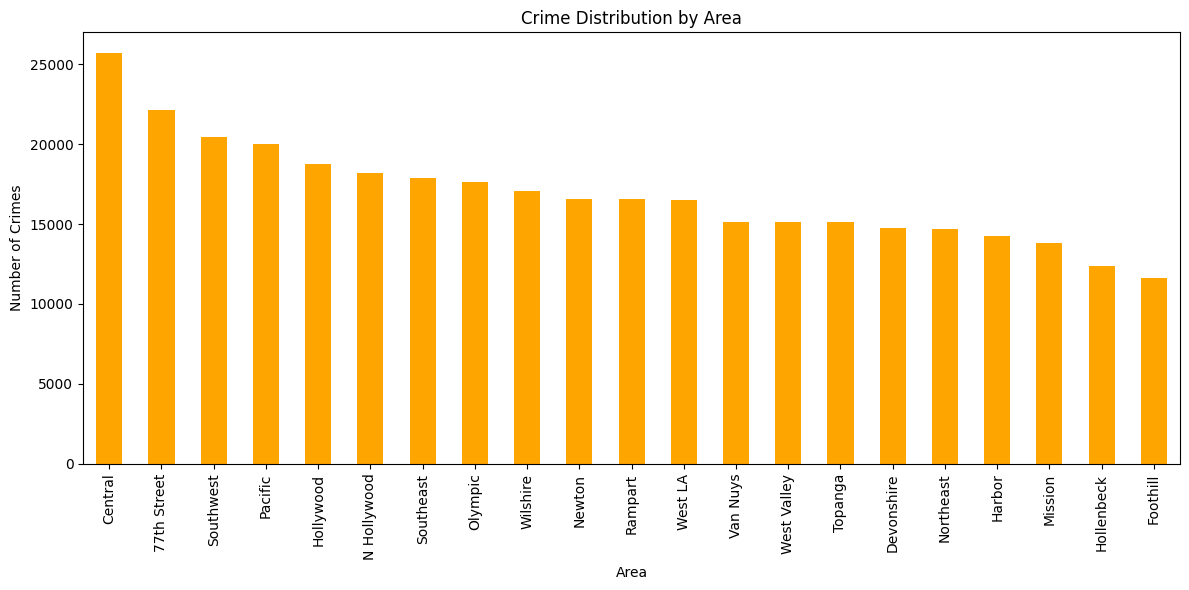

In [49]:
# Count crimes per area
area_crime_count = df['AREA NAME'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12,6))
area_crime_count.plot(kind='bar', color='orange')
plt.title('Crime Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### PiCHart

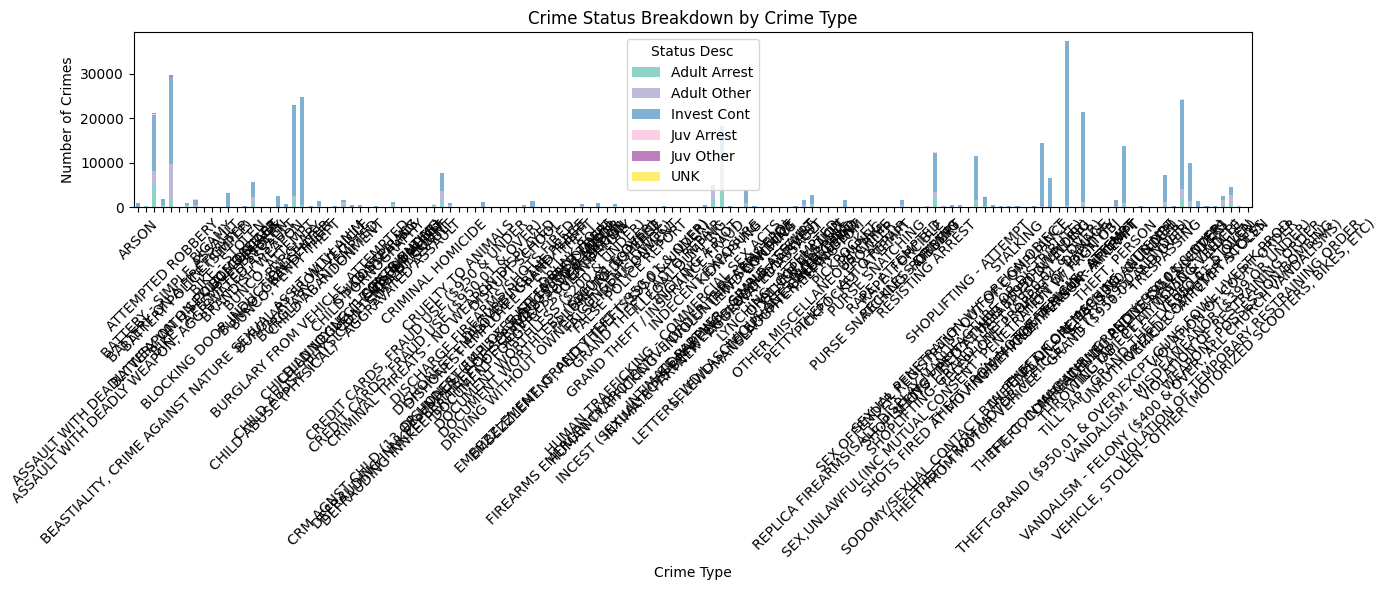

In [53]:
crime_status_breakdown = pd.crosstab(df['Crm Cd Desc'], df['Status Desc'])

# Plot stacked bar chart
crime_status_breakdown.plot(kind='bar', stacked=True, figsize=(14, 6), cmap='Set3')
plt.title('Crime Status Breakdown by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()